In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from transformers import BertTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Download stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
data = pd.read_csv("Resume.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [6]:
data.drop(columns=['Resume_html'], inplace=True)

In [7]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_70119/946927455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Category'], palette='viridis')


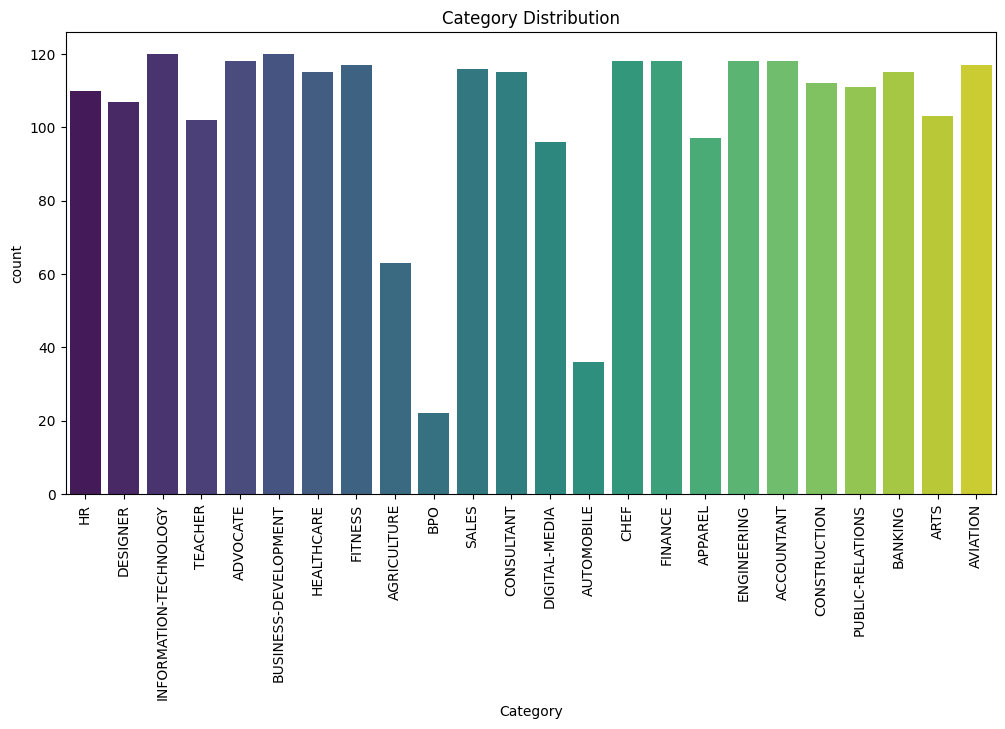

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Category'], palette='viridis') 
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [9]:
# Filter data for the "HR" category
hr_data = data[data['Category'] == 'HR']
print(f"Number of resumes in HR category: {hr_data.shape[0]}")


Number of resumes in HR category: 110


In [10]:
job_description = """Job Summary:
We are looking for HR candidate - senior role at the HR department in Amman.
Qualified candidates will have experience at the senior level and effectively manage all processes relating to employee relations, compliance, staffing, training, and culture.
Education
• Bachelor's degree in Human Resources Management or a business-related subject.

Job Requirements:
• Good knowledge of employment regulations.
• Excellent knowledge of HR practices.
• Vast working knowledge of all HR departmental areas, including reward and recognition, welfare, learning, and development, as well as HR systems and budgets.
• Knowledge of Jordan, KSA, and UAE labor law. 
• The ability to develop and nurture relationships across departments.
• The confidence to provide sound professional advice.
• The ability to lead the development of effective employment policies.
• Excellent knowledge and understanding of regulations, accepted professional standards, policies, procedures, and legislation.
• The ability to analyze and review HR data to identify trends.
• Candidates should have high negotiation and strong persuasive skills with the customers.

Duties & responsibilities:
• Provide reports on all areas of HR, onboarding, payroll, learning and development, HR policy, best practices, and workforce development.
• Advise and strategize on developing effective employment policies across the company. 
• Provide professional leadership, support, and development to HR staff to increase knowledge, share best practices, and ensure that relevant professional standards are met.
• Ensure that the company complies with current regulations, accepted professional standards, policies and procedures, and legislation
• Manage the execution of the HR strategy and core areas of the HR department, including recruitment, employee relations, workforce administration, employee engagement, payroll, reward, and recognition, as well as maintaining and improving HR systems and management of the HR budget. 
• Drive the continuous improvement agenda with a focus on engagement & welfare activities, maximizing productivity, devolving HR responsibilities to line managers, and building leadership capability.
• Ensure managers are sufficiently skilled and enabled to access appropriate guidance and information to manage workforce issues.
Minimum Requirements:

• 5–7 years of experience in the HR role.
• A pro-active attitude and a passion for leading with integrity.
• Experience in managing a skilled team and making quick but rational decisions.
• Good time management skills and the ability to prioritize, problem-solve, and use your initiative.
• Fluent in English & Arabic is a must
Knowledge, Skills, Attitude:
• Self-disciplined
• Able to solve problems in a positive manner in short time
• Strong persuasive skills and ability to exercise influence beyond the direct authority
• Presentable and good general communication skills
• Able to work in a fast-paced environment.

Employment Type
• Full-time"""

In [11]:
#1- 13879043

In [12]:
updated_resume = data.loc[data['ID'] == 13879043, 'Resume_str'].iloc[0]
print("Updated Resume for ID 13879043 chosen:\n", updated_resume)

Updated Resume for ID 13879043 chosen:
          HR CONSULTING       Summary    7+ years of Experience as a HR Partner with experience in all the facets of the Human Resource Function. Extensive background in HR generalist affairs, including experience in Recruiting, On boarding, Performance Management, employee retention, staff development, mediation, conflict resolution, Benefits and compensation, HR records management, HR policies, Jobs and Competencies. Demonstrated success in negotiating win-win compromises, developing teambuilding programs, corporate policies. Experience in Recruitment: Full life cycle recruiting involving Resourcing, Sourcing , Interviewing, Placement and On boarding. HR Generalist Responsibilities Benefits/Payroll Administration HR Policies & Procedures Performance Management Data analysis and Reporting	Staff Retention Employee Relations HR Programs Recruitment/Hiring Employee Counseling Administration Conflict Resolution	Orientation & On-Boarding SAP HR - Data

In [13]:
#2-17412079 

In [14]:
updated_resume = data.loc[data['ID'] == 17412079, 'Resume_str'].iloc[0]
print("Updated Resume for ID 17412079 chosen:\n", updated_resume)

Updated Resume for ID 17412079 chosen:
          HR CONSULTING       Summary    7+ years of Experience as a HR Partner with experience in all the facets of the Human Resource Function. Extensive background in HR generalist affairs, including experience in Recruiting, On boarding, Performance Management, employee retention, staff development, mediation, conflict resolution, Benefits and compensation, HR records management, HR policies, Jobs and Competencies. Demonstrated success in negotiating win-win compromises, developing teambuilding programs, corporate policies. Experience in Recruitment: Full life cycle recruiting involving Resourcing, Sourcing , Interviewing, Placement and On boarding. CORE FUNCTIONAL STRENGTHS HR Generalist Responsibilities Benefits/Payroll Administration HR Policies & Procedures Performance Management Data analysis and Reporting Staff Retention Employee Relations HR Programs Recruitment/Hiring Employee Counseling Administration Conflict Resolution Orientation &

In [15]:
#3-17812897 

In [16]:
updated_resume = data.loc[data['ID'] == 17812897, 'Resume_str'].iloc[0]
print("Updated Resume for ID 17812897 chosen:\n", updated_resume)

Updated Resume for ID 17812897 chosen:
          HR MANAGER         Skill Highlights           HR SKILLS  HR Department Startup  Three New Organization Startups  Employment Law  FMLA/ADA/EEO/WC  Mediation & Advocacy  HR Policies & Procedures	*Staff Recruitment & Retention  Salary Negotiations  Employee Relations  Benefits Administration  Unemployment Administration  Worker's Compensation Administration  Orientation & On-Boarding  HRIS Technologies  Training & Development  Performance Management  Organizational Development  HR Program/Project Management  HRIS applications (Lawson, Paychex, Kronos, ADP)  MS Office (Word, Excel, PowerPoint, Publisher, Access, Visio, Outlook)                Professional Experience      HR Manager     Jan 2015   to   Current      Company Name   －   City  ,   State     Manage the Human Resource function for e-Cycle's corporate office as well as their fulfillment and data center, consisting of benefits and compensation administration, payroll, employee relati

In [17]:
#4-18155310 

In [18]:
updated_resume = data.loc[data['ID'] == 18155310, 'Resume_str'].iloc[0]
print("Updated Resume for ID 18155310chosen:\n", updated_resume)

Updated Resume for ID 18155310chosen:
          HR COORDINATOR       Summary    Highly accomplish human resource professional, proficient at developing policy, standard operating procedures, and best practices. Proven expertise in recruiting, training, employee development, retention, performance management, and conflict resolution. Adept at managing multiple projects simultaneously while demonstrating high performance standards with astute attention to details and deadlines. Organizing large amounts of time sensitive information and evaluating priorities. Able to thrive under pressure while maintaining enthusiasm and motivation. Proficient in MS Word, Kronos, Excel, PowerPoint, Outlook, HCMS.          Experience      HR Coordinator     Apr 2012   to   Current      Company Name   －   City  ,   State     Ensured compliance with Federal, State, Local Laws and ARAMARK Policy  Ensured job postings were posted onsite utilizing an active Job Postings Board and all open positions are posted w

In [19]:
#5-19179079 

In [20]:
updated_resume = data.loc[data['ID'] == 19179079, 'Resume_str'].iloc[0]
print("Updated Resume for ID 19179079 :\n", updated_resume)

Updated Resume for ID 19179079 :
          RECRUITING AND HR MANAGER       Summary     Experienced Corporate Recruiter who is self-motivated, results driven, highly responsive and able to prioritize effectively to accomplish multiple tasks and stay calm under pressure.  Offering over 6 years of recruiting, human resources and staffing experience with a Bachelor's Degree in Human Resources Management.  Experience with full life-cycle recruiting of qualified IT professionals including college graduates, experienced software developers, business/technical consultants, sales executives, project managers, and executive level staff.       Highlights          Excellent interpersonal, communications and negotiation skills  Pro-active and creative sourcing strategies  Full life-cycle recruiting  Infor Talent Management  Thrive in a fast paced environment  Knowledge of EEO/AA regulations  Experience with online recruiting sources  College recruiting      Extremely adept working with multiple hir

In [21]:
#6-25724495 

In [22]:
updated_resume = data.loc[data['ID'] == 25724495, 'Resume_str'].iloc[0]
print("Updated Resume for ID 25724495 :\n", updated_resume)

Updated Resume for ID 25724495 :
          REGIONAL HR MANAGER       Summary    Holistic HR Professional with 5 years 7 months experience in Human Resources vertical in areas of
recruitment, employee relations and performance management after completing 2 years of full time          Experience      Regional HR Manager     Aug 2015   to   Dec 2016      Company Name   －   City       Looking for good HR opportunities in San Francisco Bay Area.  VISA STATUS:"Work Permit-No Visa sponsorship Required"
Skills
Staffing and recruiting professional    Microsoft Office Suite expert
Interviewing expertise     HRIS applications proficient
On Boarding/Off-boarding    Report Writing
Employee relations
 New employee orientations
Performance Management
Accomplishments
Recruited 250 employees in 4 months for launching new  RIBG (Rural Inclusive Banking Group)
vertical of ICICI Bank.  Worked on  "Female Workforce attrition at Mid Managerial level" and suggested ways to retain,
which was incorporated in p

In [23]:
#7-26202430

In [24]:
updated_resume = data.loc[data['ID'] == 26202430, 'Resume_str'].iloc[0]
print("Updated Resume for ID 26202430 :\n", updated_resume)

Updated Resume for ID 26202430 :
          HR CONSULTANT       Summary       Subject matter expert in HR Applications, and  highly effective at incorporating creative solutions to achieve business objectives, and improve efficiency.  Energetic HR Business Analyst who is self-motivated and results-driven with strong communication, analytical, problem solving and reasoning skills.        Highlights          Analytical skills  Project management  Process improvement  Quality assurance and control  System Applications implementation  Microsoft Office Suite expert      Working independently  Strong interpersonal skills  Results-oriented  Fluent in English and Portuguese  Detail-oriented  Troubleshooting  Problem solving            Experience      HR Consultant   10/2016       Company Name   City  ,   State      HRIS - Business Analyst:   

Process demand analysis, scoping, and gathering of
requirements for small and large scale HR projects
  
Prepare Business Requirement Documents after
pro

In [25]:
#8-27490876 

In [26]:
updated_resume = data.loc[data['ID'] == 27490876, 'Resume_str'].iloc[0]
print("Updated Resume for ID 27490876 :\n", updated_resume)

Updated Resume for ID 27490876 :
          HR COORDINATOR         Summary    Applicant Screening, Background Checks, Benefits Administration, Compliance, Compensation, Drug Testing, EEO Inquiries, Employee Relations, Event Planning, Full-Cycle Recruitment, Interviewing, Investigations, New Hire Orientation, Performance Evaluations, Reference Checks, Policy & Procedure Administration, Training and Development, Worker's Compensation, Unemployment Claims.        Accomplishments      Chair, Employee Diversity Council, Kindred Healthcare (2009-2010), Employee Satisfaction Survey Achievement (50% increase in Survey scores within a year), Kindred Healthcare.  Employee of the Month-2005 (Academic Counselor, University of Phoenix).  Performance Achievement Award-1998-Account Executive, Xerox Corporation.  Total Quality Management Training-1999, Xerox Document University.        Experience      Company Name     January 2014   to   Current     HR Coordinator           Develops and coordinates a c

In [27]:
#9-28808263

In [28]:
updated_resume = data.loc[data['ID'] == 28808263, 'Resume_str'].iloc[0]
print("Updated Resume for ID 28808263 :\n", updated_resume)

Updated Resume for ID 28808263 :
          HR PAYROLL/ ACCOUNTING REPRESENTATIVE         Summary    Diverse experience in Accounting, Credit Union Financial Services, Retail Sales, Customer Service, Telemarketing, Food & Beverage, Construction and Ironworks. Outstanding organizational ability with attention to detail, while balancing multiple projects in fast-paced environments with excellent interpersonal and communication skills. Demonstrated ability to gain customer trust and provide exceptional service, leading to increased repeat and referral business. Excellent leadership and motivational skills, with exceptional ability at problem solving and resolution.       Highlights         Branch Suite, N.A.D.A, Appro, Delta Docs, COWW, and other internal programs related to A/P & Payroll.   Excel spreadsheets    Meticulous attention to detail   Workers' compensation knowledge     Results-oriented, Self-directed, Microsoft Office proficiency, Time management, Strong problem solver, Resourc

In [29]:
#10-28828844

In [30]:
updated_resume = data.loc[data['ID'] == 28828844, 'Resume_str'].iloc[0]
print("Updated Resume for ID 28828844 :\n", updated_resume)

Updated Resume for ID 28828844 :
          HR GENERALIST       Professional Summary    Dependable and responsible Human Resources Generalist with over fourteen years experience in a fast-paced
environment. Solid team player with great positive attitude and exceptional people skills. Experience in many areas of HR
including benefits, compensation, employee relations, recruiting, payroll and processing of new hires and terminations.
Strong customer service and detail oriented.      Core Qualifications          Conflict resolution & creative problem solver	Able to adapt and implement change  Excellent communication skills		Quick learner  Strong Word, Excel, PowerPoint			Training and development  Accomplishments ADP, Benefits, coaching, excellent communication, conflict resolution, consultation, customer satisfaction, employee  relations, interpretation of policies, leadership, Excel, PowerPoint, Word, Payroll, People Soft, performance reviews,  performance management, personnel files, imp

In [31]:
#10-28828844 

In [32]:
updated_resume = data.loc[data['ID'] == 30563572, 'Resume_str'].iloc[0]
print("Updated Resume for ID 30563572:\n", updated_resume)

Updated Resume for ID 30563572:
          HR MANAGER/BUSINESS PARTNER           Summary    A Human Resources Business Partner with extensive experience aligning HR strategy with business strategy for assigned business groups. Employee Relations Coaching/Mentoring Talent Acquisition Salary Planning Organizational Design Workforce Planning Talent Management Succession Planning Change Management Development       Highlights          Lominger Korn/Ferry Certifications: Talking Talent, Succession Architect, Voices 360 and  Leadership Architect HRIS – Workday, PeopleSoft, Oracle, HR Workways / Taleo  Excellent Written and Verbal Communication Skills  Self-motivated, detail oriented, organized, customer focused  Maintains high level of confidentiality  Proficient with MS Word, Excel, PowerPoint, Outlook   Performance management strategies  Employment law knowledge  Employee relations  Manager coaching and training  HRIS applications proficient      Talent management  Employee Relations  Coach

In [33]:
#12-30862904 

In [34]:
updated_resume = data.loc[data['ID'] == 30862904, 'Resume_str'].iloc[0]
print("Updated Resume for ID 30862904:\n", updated_resume)

Updated Resume for ID 30862904:
          HR MANAGER             Highlights          SENIOR HUMAN RESOURCES STRATEGIST / RECRUITMENT MANAGER  Talent Management | Strategic Recruitment Planning  Organizational Development  Top-performing Human Resources Professional with 10+ years of experience providing innovative and results-driven leadership within small and large organizations. Proven ability to effectively communicate with staff on all corporate levels, create and inspire positive relationships, and build solid teams of professional employees.  Expert in designing effective recruiting strategies targeting top-quality talent, performing contract negotiations, and creating initiatives improving employee satisfaction and retention. Characterized as a compassionate manager, strategic leader, and executive recruiter.  Value Offered  Workforce Planning  Team Building & Facilitation  Project Management  Vendor Relations  FMLA  Employee Retention  Performance Appraisal  Behavioral Intervie

In [35]:
#13-34740556

In [36]:
updated_resume = data.loc[data['ID'] == 34740556, 'Resume_str'].iloc[0]
print("Updated Resume for ID 34740556:\n", updated_resume)

Updated Resume for ID 34740556:
          SENIOR HR BUSINESS PARTNER           Summary     Human Resources Professional with 8 years of experience in human resources and recruiting. Expertise in Employee Relations and Recruiting. Highly driven to achieve company goals.        Highlights          HUMAN RESOURCES MANAGER  Extensive background in HR Business Partner affairs, including experience in, staff development, mediation, conflict resolution, benefits and compensation, HR records management, HR policies development and legal compliance.  Demonstrated success in negotiating win-win compromises, developing teambuilding programs, and writing policies, job descriptions and management reports.  HR SKILLS  Employment Law  FMLA/ADA/EEO/WC  HR Policies & Procedures	*Staff Recruitment & Retention  Employee Relations  Benefits Administration	*Orientation & On-Boarding  Training & Development  Organizational Development  MS Office (Word, Excel, PowerPoint, Access, Outlook)                Expe

In [37]:
#14-39081840

In [38]:
updated_resume = data.loc[data['ID'] == 39081840, 'Resume_str'].iloc[0]
print("Updated Resume for ID 39081840:\n", updated_resume)

Updated Resume for ID 39081840:
          HR COORDINATOR       Summary     To obtain a Human Resources Generalist position that will fully utilize my extensive background and in HR, including experience in onboarding, payroll, benefits and compensation, HR policies and training and development       Human Resources Skills     Payroll · Benefits Administration · Employment Law · FMLA/ADA/EEO/WC · HR Policies
  & Procedures · Staffing & Retention· Employee Relations · HR
  Program/Project Management · Orientation
  & On-Boarding · HRIS
  Technologies · Training &
  Development·  Performance
  Management        Professional Experience      HR Coordinator   12/2015   to   Current     Company Name   City  ,   State       Process bi-weekly benefits deduction for payroll
on time in Fidelity payroll system and answered employee's questions
regarding timesheet, leave, and pay questions.         Worked with senior-level management to create fair
training and development policy. Administered trai

In [39]:
#15-44476983 

In [40]:
updated_resume = data.loc[data['ID'] == 44476983, 'Resume_str'].iloc[0]
print("Updated Resume for ID 44476983:\n", updated_resume)

Updated Resume for ID 44476983:
          HR BUSINESS PARTNER       Summary     Proactive Human Resources Business Partner guiding performance management, talent planning and benefits. Decisive with proven success providing employee relations support and oversight for efficient operations. Extensive knowledge and experience developing code of business conduct and ethics policies.       Skills          Leadership development  Collaborative  Organization and efficiency  Exemplary verbal and written communication      Time management  Conflict mediation  Self-starter  HR experience in Technology Field            Professional Experience      HR Business Partner   |   Company Name    -    City  ,   State     |   08/2020   -   01/2021     Served as the primary point of contact for the HR department for each assigned network by providing direct assistance or connecting them with the appropriate HR Specialist.  Advised supervisors and management in performance management strategies and interve

In [41]:
#16-46258701

In [42]:
updated_resume = data.loc[data['ID'] == 46258701, 'Resume_str'].iloc[0]
print("Updated Resume for ID 46258701:\n", updated_resume)

Updated Resume for ID 46258701:
          HR COORDINATOR       Professional Summary     Highly efficient Hr Coordinator well established in administrative environments that are fast-paced and challenging.       Core Qualifications          Exceptional interpersonal skills  Innovative  Microsoft Office Suite expert  Human resources audits  Maintains confidentiality  Personnel records maintenance  New hire orientation        Applicant Tracking System  EEO Reporting  HRMS  People-oriented  Organized  Exceptional communicator  Recruiting            Experience      HR Coordinator  ,   09/2012   -   Current    Company Name   -   City  ,   State     ?Responsible for initiating, tracking and follow up of background checks and drug tests. ? First day on-board for new employee - first day documents, I-9 and tour of the building. ? Conducts exit interviews - relays info back to management. ? Routes positions for approval and posts requisitions to the company careers page and to outside job boards

# new tries hr data

In [44]:
# List of chosen IDs
chosen_ids = [
    46258701, 44476983, 39081840, 34740556, 30862904, 28828844,
    28808263, 27490876, 26202430, 25724495, 19179079, 18155310,
    17812897, 17412079, 13879043, 30563572
]

# Create the "chosen/not chosen" feature
hr_data['chosen'] = hr_data['ID'].apply(lambda x: 1 if x in chosen_ids else 0)

# Display the updated DataFrame
print(hr_data)

           ID                                         Resume_str Category  \
0    16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       HR   
1    22323967           HR SPECIALIST, US HR OPERATIONS      ...       HR   
2    33176873           HR DIRECTOR       Summary      Over 2...       HR   
3    27018550           HR SPECIALIST       Summary    Dedica...       HR   
4    17812897           HR MANAGER         Skill Highlights  ...       HR   
..        ...                                                ...      ...   
105  30563572           HR MANAGER/BUSINESS PARTNER          ...       HR   
106  24402267           DESIGNATION: HR ASSISTANT       Profe...       HR   
107  32308556           HR VOLUNTEER ASST. MANAGER       Prof...       HR   
108  27847081           HR SPECIALIST/ HORIZONTAL ENGINEER   ...       HR   
109  25150191           HR CONTACT CENTER SPECIALIST       Su...       HR   

     chosen  
0         0  
1         0  
2         0  
3         0  
4    

/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_70119/1358195666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data['chosen'] = hr_data['ID'].apply(lambda x: 1 if x in chosen_ids else 0)


In [45]:
hr_data

,ID,Resume_str,Category,chosen
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",HR,0
2,33176873,HR DIRECTOR Summary Over 2...,HR,0
3,27018550,HR SPECIALIST Summary Dedica...,HR,0
4,17812897,HR MANAGER Skill Highlights ...,HR,1
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,HR,1
106,24402267,DESIGNATION: HR ASSISTANT Profe...,HR,0
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,HR,0
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,HR,0


In [46]:
hr_data.drop(columns=['Category'], inplace=True)

/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_70119/3119910572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr_data.drop(columns=['Category'], inplace=True)


In [47]:
hr_data

,ID,Resume_str,chosen
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0
2,33176873,HR DIRECTOR Summary Over 2...,0
3,27018550,HR SPECIALIST Summary Dedica...,0
4,17812897,HR MANAGER Skill Highlights ...,1
...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0


In [48]:
hr_data.to_csv("hr_data.csv", index=False)

# try 1 --> without any text cleaning for Resume_str and job description

In [50]:
hr_data = pd.read_csv("hr_data.csv")

In [51]:
hr_data

,ID,Resume_str,chosen
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0
2,33176873,HR DIRECTOR Summary Over 2...,0
3,27018550,HR SPECIALIST Summary Dedica...,0
4,17812897,HR MANAGER Skill Highlights ...,1
...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0


In [52]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [53]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['Resume_str'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
# Generate BERT embedding for the job description
job_desc_embedding = model.encode([job_description])

In [77]:
def compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data):
    # Ensure job_desc_embedding is a 2D array (1, N) where N is the embedding size
    job_desc_embedding = np.array(job_desc_embedding).reshape(1, -1)
    
    # Compute cosine similarity between the job description and all resumes
    similarity_scores = cosine_similarity(job_desc_embedding, resume_embeddings)

    # Get all similarity scores for the job description with respect to each resume
    all_similarity_scores = similarity_scores[0]

    # Calculate the number of resumes to select (top 5%)
    top_5_percent_count = int(len(all_similarity_scores) * 0.05)

    # Get the indices of the top 5% most similar resumes
    top_5_percent_indices = all_similarity_scores.argsort()[-top_5_percent_count:][::-1]

    # Retrieve the top 5% most similar resumes
    recommended_resumes = hr_data.iloc[top_5_percent_indices].copy()

    # Retrieve the scores for the top 5% resumes
    top_5_percent_scores = all_similarity_scores[top_5_percent_indices]

    # Assign similarity scores explicitly
    recommended_resumes['similarity_score'] = top_5_percent_scores

    # Create the 'ai_chosen' column based on top 5% similarity scores in the original hr_data
    hr_data['ai_chosen'] = np.where(hr_data.index.isin(top_5_percent_indices), 1, 0)

    # Ensure the 'ai_chosen' column is also added to the recommended_resumes DataFrame
    recommended_resumes['ai_chosen'] = hr_data.loc[top_5_percent_indices, 'ai_chosen'].values

    return recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices



In [78]:
def evaluate_model(hr_data, top_5_percent_indices):
    # Get human ground truth (chosen column)
    y_true = hr_data['chosen'].values
    # Get AI predictions (ai_chosen column)
    y_pred = hr_data['ai_chosen'].values

    # Calculate evaluation metrics
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Output evaluation results
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    print("\nConfusion Matrix:")
    print(conf_matrix)

    return precision, recall, f1, accuracy, conf_matrix


In [61]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Accuracy: 0.8091

Confusion Matrix:
[[89  5]
 [16  0]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
88   13376919           REGIONAL HR DEPUTY MANAGER       Summ...       0   
93   39970711           HR & SAFETY MANAGER           Summary...       0   
41   59962788           HR EXECUTIVE       Professional Summa...       0   
109  25150191           HR CONTACT CENTER SPECIALIST       Su...       0   
5    11592605           HR GENERALIST       Summary     Dedic...       0   

     ai_chosen  similarity_score  
88           1          0.858848  
93           1          0.854514  
41           1          0.849616  
109          1          0.848621  
5            1          0.848353  


# try 2  with preprocess_text , lower 

In [79]:
hr_data = pd.read_csv("hr_data.csv")

In [80]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [81]:
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(preprocess_text)
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,0,hr director summary 20 years experience recrui...
3,27018550,HR SPECIALIST Summary Dedica...,0,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,1,hr manager skill highlights hr skills hr depar...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,hr managerbusiness partner summary human resou...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,designation hr assistant professional summary ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,hr volunteer asst manager professional summary...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,hr specialist horizontal engineer professional...


In [82]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [83]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [86]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.4000
Recall: 0.1250
F1 Score: 0.1905
Accuracy: 0.8455

Confusion Matrix:
[[91  3]
 [14  2]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
35   32947778           HR MANAGER         Summary     Human ...       0   
105  30563572           HR MANAGER/BUSINESS PARTNER          ...       1   
7    15375009           HR MANAGER         Professional Summa...       0   
77   44476983           HR BUSINESS PARTNER       Summary    ...       1   
32   17855844           HR MANAGER       Executive Profile   ...       0   

     ai_chosen  similarity_score  
35           1          0.909434  
105          1          0.904647  
7            1          0.896627  
77           1          0.888789  
32           1          0.888147  


In [ ]:
hr_data = pd.read_csv("hr_data.csv")

# try 3 with upper

In [87]:
hr_data = pd.read_csv("hr_data.csv")

In [88]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.upper()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [89]:
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(preprocess_text)
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,HR ADMINISTRATORMARKETING ASSOCIATE HR ADMINIS...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,HR SPECIALIST US HR OPERATIONS SUMMARY VERSATI...
2,33176873,HR DIRECTOR Summary Over 2...,0,HR DIRECTOR SUMMARY OVER 20 YEARS EXPERIENCE I...
3,27018550,HR SPECIALIST Summary Dedica...,0,HR SPECIALIST SUMMARY DEDICATED DRIVEN AND DYN...
4,17812897,HR MANAGER Skill Highlights ...,1,HR MANAGER SKILL HIGHLIGHTS HR SKILLS HR DEPAR...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,HR MANAGERBUSINESS PARTNER SUMMARY A HUMAN RES...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,DESIGNATION HR ASSISTANT PROFESSIONAL SUMMARY ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,HR VOLUNTEER ASST MANAGER PROFESSIONAL SUMMARY...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,HR SPECIALIST HORIZONTAL ENGINEER PROFESSIONAL...


In [90]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [91]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [92]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [93]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Accuracy: 0.8091

Confusion Matrix:
[[89  5]
 [16  0]]

Recommended Resumes:
          ID                                         Resume_str  chosen  \
7   15375009           HR MANAGER         Professional Summa...       0   
41  59962788           HR EXECUTIVE       Professional Summa...       0   
26  14225422           HR MANAGER/GENERALIST       Summary  ...       0   
72  26289308           SENIOR HR MANAGER, HR BUSINESS PARTNE...       0   
86  18557164           HR BUSINESS PARTNER II       Summary ...       0   

    ai_chosen  similarity_score  
7           1          0.872832  
41          1          0.862569  
26          1          0.860724  
72          1          0.853105  
86          1          0.850480  


# try 4  with all-MiniLM-L6-v2 model embedding lower

In [94]:
hr_data = pd.read_csv("hr_data.csv")

In [96]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.lower()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [97]:
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(preprocess_text)
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,hr administratormarketing associate hr adminis...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,0,hr director summary 20 years experience recrui...
3,27018550,HR SPECIALIST Summary Dedica...,0,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,1,hr manager skill highlights hr skills hr depar...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,hr managerbusiness partner summary human resou...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,designation hr assistant professional summary ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,hr volunteer asst manager professional summary...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,hr specialist horizontal engineer professional...


In [98]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [99]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [101]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])



Precision: 0.4000
Recall: 0.1250
F1 Score: 0.1905
Accuracy: 0.8455

Confusion Matrix:
[[91  3]
 [14  2]]

Recommended Resumes:
          ID                                         Resume_str  chosen  \
11  11480899           HR MANAGER         Summary      Human...       0   
4   17812897           HR MANAGER         Skill Highlights  ...       1   
77  44476983           HR BUSINESS PARTNER       Summary    ...       1   
22  25676643           HR SPECIALIST       Summary    An Hum...       0   
69  80162314           HR PROFESSIONAL       Summary     Dep...       0   

    ai_chosen  similarity_score  
11          1          0.903382  
4           1          0.897865  
77          1          0.889942  
22          1          0.883371  
69          1          0.876482  


# try 5 with all-MiniLM-L6-v2 model embedding upper

In [102]:
hr_data = pd.read_csv("hr_data.csv")

In [103]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase , try upper 
    text = text.upper()
    # Remove special characters (but keep numbers) keep 
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

In [104]:
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(preprocess_text)
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,HR ADMINISTRATORMARKETING ASSOCIATE HR ADMINIS...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,HR SPECIALIST US HR OPERATIONS SUMMARY VERSATI...
2,33176873,HR DIRECTOR Summary Over 2...,0,HR DIRECTOR SUMMARY OVER 20 YEARS EXPERIENCE I...
3,27018550,HR SPECIALIST Summary Dedica...,0,HR SPECIALIST SUMMARY DEDICATED DRIVEN AND DYN...
4,17812897,HR MANAGER Skill Highlights ...,1,HR MANAGER SKILL HIGHLIGHTS HR SKILLS HR DEPAR...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,HR MANAGERBUSINESS PARTNER SUMMARY A HUMAN RES...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,DESIGNATION HR ASSISTANT PROFESSIONAL SUMMARY ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,HR VOLUNTEER ASST MANAGER PROFESSIONAL SUMMARY...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,HR SPECIALIST HORIZONTAL ENGINEER PROFESSIONAL...


In [27]:
pip install PyPDF2 python-docx


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 232 kB 878 kB/s eta 0:00:01
     |████████████████████████████████| 244 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 8.1 MB 13.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
import os
import PyPDF2
from docx import Document

def cv_reader(file_path):
    """
    Reads a CV or resume from a given file in supported formats (PDF, DOC, DOCX, TXT).

    Args:
        file_path (str): Path to the file.

    Returns:
        str: The extracted text content from the file.
    """
    # Check the file extension
    _, file_extension = os.path.splitext(file_path)
    
    try:
        if file_extension == '.pdf':
            return read_pdf(file_path)
        elif file_extension == '.docx':
            return read_docx(file_path)
        elif file_extension == '.doc':
            return read_doc(file_path)  
        elif file_extension == '.txt':
            return read_txt(file_path)
        else:
            raise ValueError(f"Unsupported file format: {file_extension}")
    except Exception as e:
        return f"An error occurred while reading the file: {str(e)}"

def read_pdf(file_path):
    """Reads text from a PDF file."""
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = []
        for page in reader.pages:
            text.append(page.extract_text())
        return '\n'.join(text)

def read_docx(file_path):
    """Reads text from a DOCX file."""
    doc = Document(file_path)
    text = [paragraph.text for paragraph in doc.paragraphs]
    return '\n'.join(text)

def read_doc(file_path):
    """Reads text from a DOC file (requires LibreOffice or `python-docx` conversion)."""
    raise NotImplementedError("Support for .doc files requires additional setup, such as using LibreOffice or unoconv.")

def read_txt(file_path):
    """Reads text from a plain text file."""
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [31]:
file_path = '93112113.pdf'
text_content = cv_reader(file_path)
print(text_content)


HR MANAGER
Summary
Human Resources professional with the ability to work successfully with all levels of an organization, deliver expected results, consistently resolve
issues, communicate sensitive information, identify opportunities for improvement and make suggestions for change.
Highlights
Staffing and recruiting
Performance management
Employee benefits
Employment law
Employee and labor relations
Manager coaching and training
Experience
HR Manager
 
10/2013
 
to 
Current
 
Company Name
 
City
 
, 
State
Address employee and management questions, interpret and enforce collective bargaining agreement and help resolve work-related
challenges.
Counsel employees to correct performance issues and deficiencies.
Coach managers on disciplining and terminating employees to minimize liability.
Facilitate management communication meetings with employees.
Update senior management on Corporate initiated, Company wide HR matters.
Ensure on-boarding of quality employees through established and eff

In [105]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [106]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['cleaned_resume'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [107]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [108]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.2000
Recall: 0.0625
F1 Score: 0.0952
Accuracy: 0.8273

Confusion Matrix:
[[90  4]
 [15  1]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
11   11480899           HR MANAGER         Summary      Human...       0   
57   28828844           HR GENERALIST       Professional Summ...       1   
24   87968870           HR GENERALIST         Summary    Ener...       0   
41   59962788           HR EXECUTIVE       Professional Summa...       0   
106  24402267           DESIGNATION: HR ASSISTANT       Profe...       0   

     ai_chosen  similarity_score  
11           1          0.771906  
57           1          0.746534  
24           1          0.745183  
41           1          0.741350  
106          1          0.734510  


# Try 6 with all-MiniLM-L6-v2 model embedding WITHOUT CLEANING

In [109]:
hr_data = pd.read_csv("hr_data.csv")

In [110]:
# Load the pre-trained BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

In [111]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['Resume_str'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [112]:
# Generate BERT embedding for the job description
job_desc_embedding = model.encode([job_description])

In [113]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.2000
Recall: 0.0625
F1 Score: 0.0952
Accuracy: 0.8273

Confusion Matrix:
[[90  4]
 [15  1]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
4    17812897           HR MANAGER         Skill Highlights  ...       1   
30   49937469           HR ASSISTANT             Highlights  ...       0   
11   11480899           HR MANAGER         Summary      Human...       0   
69   80162314           HR PROFESSIONAL       Summary     Dep...       0   
106  24402267           DESIGNATION: HR ASSISTANT       Profe...       0   

     ai_chosen  similarity_score  
4            1          0.689724  
30           1          0.682418  
11           1          0.678825  
69           1          0.678006  
106          1          0.673914  


# try  Bert Tokenizer

In [148]:
hr_data = pd.read_csv("hr_data.csv")

In [149]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_text(text):
    # Convert to lowercase (BERT uncased model already handles this)
    text = text.lower()
    
    # Remove special characters (but keep numbers and common symbols like '@' and '-')
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)
 
    
    # Tokenize the text using the BERT tokenizer
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join the processed tokens back into a string
    return ' '.join(filtered_tokens)

In [150]:
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(preprocess_text)
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,hr administrator ##market ##ing associate hr a...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,hr specialist us hr operations summary versati...
2,33176873,HR DIRECTOR Summary Over 2...,0,hr director summary 20 years experience recrui...
3,27018550,HR SPECIALIST Summary Dedica...,0,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,1,hr manager skill highlights hr skills hr depar...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,hr manager ##bus ##iness partner summary human...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,designation hr assistant professional summary ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,hr volunteer ass ##t manager professional summ...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,hr specialist horizontal engineer professional...


In [151]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [152]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['Resume_str'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [153]:
# Preprocess the job description
cleaned_job_desc = preprocess_text(job_description)

# Generate BERT embedding for the job description
job_desc_embedding = model.encode([cleaned_job_desc])

In [154]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.2000
Recall: 0.0625
F1 Score: 0.0952
Accuracy: 0.8273

Confusion Matrix:
[[90  4]
 [15  1]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
35   32947778           HR MANAGER         Summary     Human ...       0   
105  30563572           HR MANAGER/BUSINESS PARTNER          ...       1   
54   18422164           HR SPECIALIST       Summary    Result...       0   
32   17855844           HR MANAGER       Executive Profile   ...       0   
20   30163002           HR GENERALIST           Summary    Yo...       0   

     ai_chosen  similarity_score  
35           1          0.891349  
105          1          0.882734  
54           1          0.872757  
32           1          0.868832  
20           1          0.858338  


# try 8 

In [162]:
hr_data = pd.read_csv("hr_data.csv")

In [163]:
def preprocess_text(text, tokenizer, remove_stopwords=True, lemmatize=True):
    import re
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Convert to lowercase
    text = text.lower()

    # Remove special characters (but keep numbers and common symbols like '@' and '-')
    text = re.sub(r'[^a-zA-Z0-9-@\s]', '', text)

    # Tokenize the text into words
    word_tokens = word_tokenize(text)

    # Tokenize the text using the BERT tokenizer
    bert_tokens = tokenizer.tokenize(' '.join(word_tokens))

    # Remove stopwords if enabled
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        bert_tokens = [word for word in bert_tokens if word not in stop_words]

    # Lemmatize tokens if enabled
    if lemmatize:
        bert_tokens = [lemmatizer.lemmatize(word) for word in bert_tokens]

    # Join the processed tokens back into a string
    processed_text = ' '.join(bert_tokens)

    return processed_text


In [164]:
import pandas as pd
from transformers import BertTokenizer
from nltk import download

# Download required NLTK data
download('punkt')
download('wordnet')
download('stopwords')

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Apply the preprocessing function
hr_data['cleaned_resume'] = hr_data['Resume_str'].apply(
    lambda x: preprocess_text(x, tokenizer, remove_stopwords=True, lemmatize=True)
)

# Display the DataFrame
print(hr_data)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


           ID                                         Resume_str  chosen  \
0    16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...       0   
1    22323967           HR SPECIALIST, US HR OPERATIONS      ...       0   
2    33176873           HR DIRECTOR       Summary      Over 2...       0   
3    27018550           HR SPECIALIST       Summary    Dedica...       0   
4    17812897           HR MANAGER         Skill Highlights  ...       1   
..        ...                                                ...     ...   
105  30563572           HR MANAGER/BUSINESS PARTNER          ...       1   
106  24402267           DESIGNATION: HR ASSISTANT       Profe...       0   
107  32308556           HR VOLUNTEER ASST. MANAGER       Prof...       0   
108  27847081           HR SPECIALIST/ HORIZONTAL ENGINEER   ...       0   
109  25150191           HR CONTACT CENTER SPECIALIST       Su...       0   

                                        cleaned_resume  
0    hr administrator ##market

In [165]:
hr_data

,ID,Resume_str,chosen,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,0,hr administrator ##market ##ing associate hr a...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...",0,hr specialist u hr operation summary versatile...
2,33176873,HR DIRECTOR Summary Over 2...,0,hr director summary 20 year experience recruit...
3,27018550,HR SPECIALIST Summary Dedica...,0,hr specialist summary dedicated driven dynamic...
4,17812897,HR MANAGER Skill Highlights ...,1,hr manager skill highlight hr skill hr departm...
...,...,...,...,...
105,30563572,HR MANAGER/BUSINESS PARTNER ...,1,hr manager ##bus ##iness partner summary human...
106,24402267,DESIGNATION: HR ASSISTANT Profe...,0,designation hr assistant professional summary ...
107,32308556,HR VOLUNTEER ASST. MANAGER Prof...,0,hr volunteer as ##t manager professional summa...
108,27847081,HR SPECIALIST/ HORIZONTAL ENGINEER ...,0,hr specialist horizontal engineer professional...


In [166]:
# Load the pre-trained BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [167]:
# Generate BERT embeddings for resumes
resume_embeddings = model.encode(hr_data['Resume_str'].tolist(), show_progress_bar=True)

# Convert embeddings to a NumPy array (for efficient computation)
resume_embeddings = np.array(resume_embeddings)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [169]:
# Step 1: Compute cosine similarity and get the recommended resumes
recommended_resumes, hr_data, all_similarity_scores, top_5_percent_indices = compute_cosine_similarity(job_desc_embedding, resume_embeddings, hr_data)

# Step 2: Evaluate the model's performance based on human choices and AI's selections
precision, recall, f1, accuracy, conf_matrix = evaluate_model(hr_data, top_5_percent_indices)

# Display recommended resumes
print("\nRecommended Resumes:")
print(recommended_resumes[['ID', 'Resume_str', 'chosen', 'ai_chosen', 'similarity_score']])


Precision: 0.2000
Recall: 0.0625
F1 Score: 0.0952
Accuracy: 0.8273

Confusion Matrix:
[[90  4]
 [15  1]]

Recommended Resumes:
           ID                                         Resume_str  chosen  \
35   32947778           HR MANAGER         Summary     Human ...       0   
105  30563572           HR MANAGER/BUSINESS PARTNER          ...       1   
54   18422164           HR SPECIALIST       Summary    Result...       0   
32   17855844           HR MANAGER       Executive Profile   ...       0   
20   30163002           HR GENERALIST           Summary    Yo...       0   

     ai_chosen  similarity_score  
35           1          0.891349  
105          1          0.882734  
54           1          0.872757  
32           1          0.868832  
20           1          0.858338  
